## Investigation of relationships between life expectancy and GDP based on data from the World Health Organization and the World Bank

In this data set columns have the following meaning:

- Country - nation
- Year - year of the observation
- Life expectancy at birth (years) - life expectancy value in years, further referred as LE 
- GDP - Gross Domestic Product in U.S. dollars

Import all needed libraries:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

Read and investigate dataset

In [2]:
df = pd.read_csv('all_data.csv')
print(df.head()) 

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


For convenience purposes replace United States of America with USA

In [3]:
df.Country = df.Country.apply(lambda x: 'USA' if x == 'United States of America' else x)

Also let's make separate dataframe for each country it will be useful for further investigation

In [4]:
Chile = df[df.Country == 'Chile']
China = df[df.Country == 'China']
Germany = df[df.Country == 'Germany']
Mexico = df[df.Country == 'Mexico']
USA = df[df.Country == 'USA']
Zimbabwe = df[df.Country == 'Zimbabwe']

## EDA

In [5]:
print(df.describe())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


Based on data above one can conclude that LE is left skewed. It indicate that either some countrie(s) have significantly different LE or for all counties there was some years with significant difference in LE. Same conclusion fair for GDP.

In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


We got good dataset without missing data and with appropriate data formats. 

Let's plot pairwise relationships in the dataset, it will give quick overview of all relations between variables in dataset (non diagonal graphs) and data distribution inside variable(diagonal graphs).

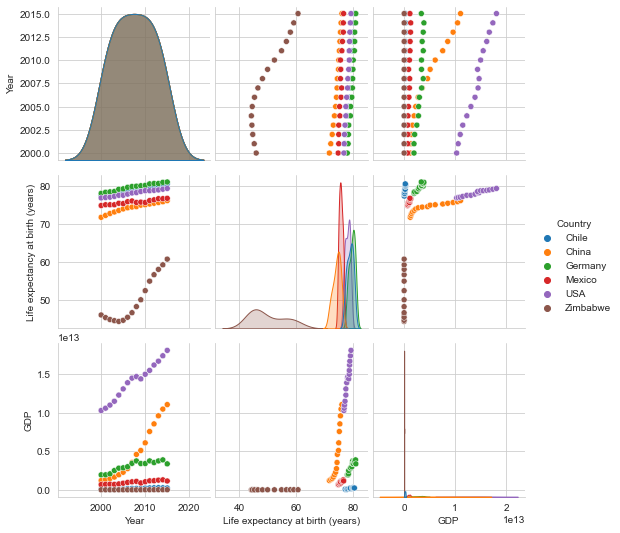

In [7]:
sns.set_style('whitegrid')
sns.color_palette('pastel')
sns.pairplot(df, hue  = 'Country') 

On the graph above few subgraphs attracts attention:
- distribution of LE  
- distribution of GDP

- LE vs year
- GDP vs year
- LE vs GDP

Let's look at graphs of interest close to make some conclusions.

### Distribution of LE:

Text(0.5, 1.0, 'Life expectancy distribution by country')

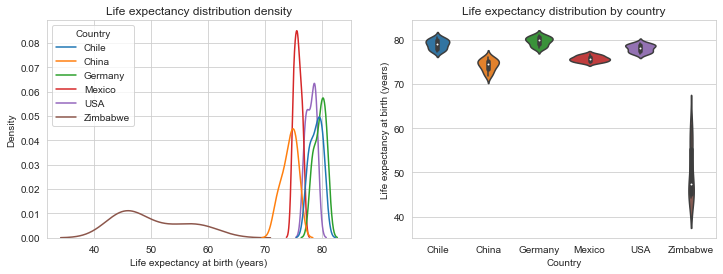

In [8]:
plt.figure(figsize = (12,4))
plt.subplot(121)
ax1 = sns.kdeplot(data = df, x = 'Life expectancy at birth (years)' , hue = 'Country' )
plt.title('Life expectancy distribution density')

plt.subplot(122)
ax2 = sns.violinplot(data = df, x="Country", y = 'Life expectancy at birth (years)'  )
plt.title('Life expectancy distribution by country')

Both graphs above shove LE distribution.

Attentive reader may notice that shape of 'violins' on violin graph exactly the same as shape of peaks  on the left graph rotated by 90 degree, height of 'violin' equals to bottom width of the peak.

High peak for Mexico means low variance of LE in that country during observed period and vice versa for Zimbabwe low peac means high variance of LE.

Our guess from EDA got some proof. One country(Zimbabwe) have significantly lower LE than others(median less than 50) and it(LE) have been significantly changing during observed period. While other countries have closer LE medians. Among top countries Germany have the highest LE median, the lowes for China. China also showed the biggest variance of LE median, Mexico shoved the lowest variance of LE median.

### distribution of GDP:

Text(0.5, 1.0, 'GDP distribution by country')

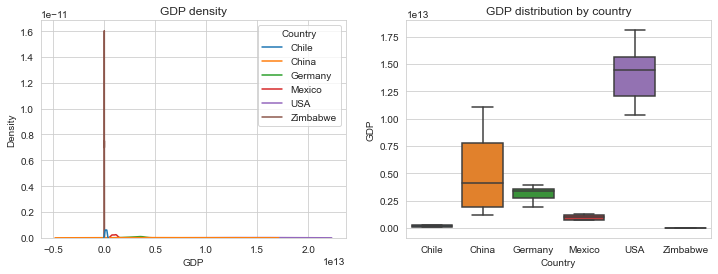

In [9]:
plt.figure(figsize = (12,4))
plt.subplot(121)
ax3 = sns.kdeplot(data = df, x = 'GDP' , hue = 'Country' )
plt.title('GDP density')

plt.subplot(122)
ax4 = sns.boxplot(data = df, x="Country", y = 'GDP'  )
plt.title('GDP distribution by country')
#plt.xticks(rotation=30)

Both graph above shove GDP distribution

Left graph is hard to read because of Zimbabwe peak, it shows extremely low variance of GDP for this country during observed period compared to other countries. Right graph proves this conclusion.

Over observed period US have had the highest median GDP and significant GDP variance, China have the highest variance among all countries which indicates on significant changes inside country.

### LE vs year and GDP vs year

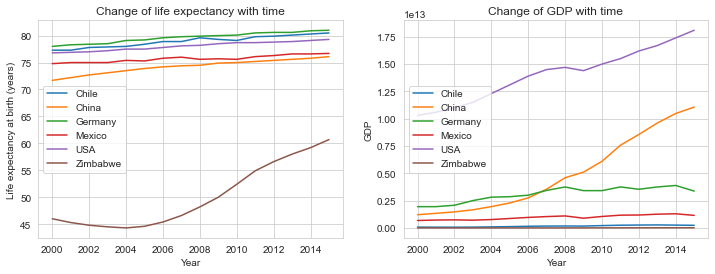

In [10]:
plt.figure(figsize = (12,4))

plt.subplot(121)
sns.lineplot(data = df, x='Year', y = 'Life expectancy at birth (years)', hue = 'Country')
plt.title('Change of life expectancy with time')
plt.legend(loc=6)

plt.subplot(122)
sns.lineplot(data = df, x='Year', y = 'GDP', hue = 'Country')
plt.title('Change of GDP with time')
plt.legend(loc=6)

Left graph show obvious growth of LE with time for all countries. Countries with high LE show slow growth(3-6 %) while country with low LE shoved 33% growth. But, probably, it would be wrong to say that  time flow it self causes to increase of LE.

On right graph one can see that US and China showed significant growth of GDP over time. Other countries also shows some growth but not as strong as US and China. It worth mention about huge difference in GDP between different countries on the graph.

It is tempting to conclude that with GDP growth LE also growth but let's look at graphs closer before making any conclusion. 
But in general we can say that overall situation in countries becomes better which leads to growth of LE.

### LE vs GDP

Text(0.5, 1.0, '')

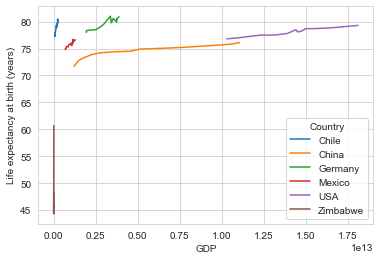

In [11]:
ax7 = sns.lineplot(data = df, x= 'GDP', y = 'Life expectancy at birth (years)', hue = 'Country')
plt.title('')

On graph above Zimbabwe seams to be obvious outlier, other countries are in narrow range of LE (77 +- 5 years) while having big GDP differences. 

Let's look closer at US and Chile - countries with similar LE and different GDP.

<AxesSubplot:xlabel='Year', ylabel='GDP'>

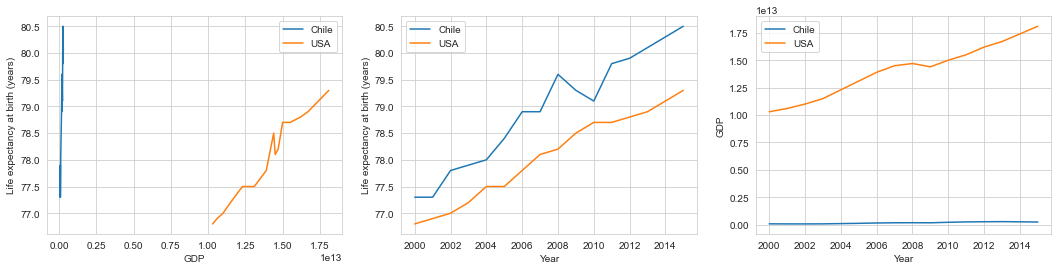

In [12]:
# LE vs GDP
plt.figure(figsize = (18,4))
plt.subplot(131)
sns.lineplot(data = Chile, x= 'GDP', y = 'Life expectancy at birth (years)', label = 'Chile')
sns.lineplot(data = USA, x= 'GDP', y = 'Life expectancy at birth (years)', label = 'USA')

# LE vs Time
plt.subplot(132)
sns.lineplot(data = Chile, x= 'Year', y = 'Life expectancy at birth (years)', label = 'Chile')
sns.lineplot(data = USA, x= 'Year', y = 'Life expectancy at birth (years)', label = 'USA')

# GDP vs Time
plt.subplot(133)
sns.lineplot(data = Chile, x= 'Year', y = 'GDP', label = 'Chile')
sns.lineplot(data = USA, x= 'Year', y = 'GDP', label = 'USA')

Look at right graph, GDP is growing for both countries over time (scroll down to look at separate graph for Chile). Now look at middle graph: LE growth for both countries as well. One can conclude: growth of GDP causes growth of LE (the higher GDP the higher LE). So one would expect for country with higher GDP to have higher LE. But that is not the case. Chile have 100 times lower GDP than US,  at the same time it have 5 years higher LE than US which is well shown on the left graph.

The same info as on graphs above but each country displayed on separate graph:

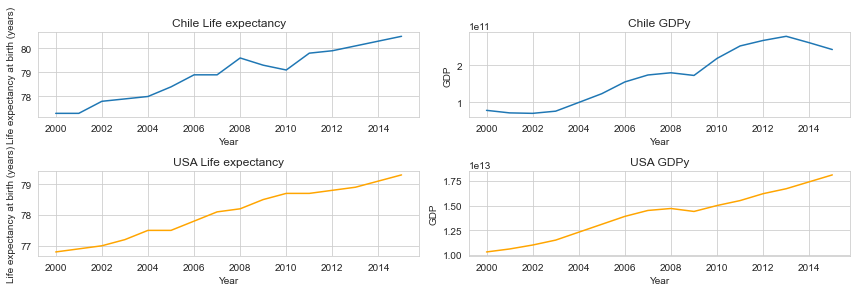

In [17]:
# Chile LE
plt.figure(figsize = (12,4))
plt.subplot(221)
sns.lineplot(data = Chile, x= 'Year', y = 'Life expectancy at birth (years)')
plt.title('Chile Life expectancy')

# Chile GDPy
plt.subplot(222)
sns.lineplot(data = Chile, x= 'Year', y = 'GDP')
plt.title('Chile GDPy')

# USA Life expectancy
plt.subplot(223)
sns.lineplot(data = USA, x= 'Year', y = 'Life expectancy at birth (years)', color = 'orange')
plt.title('USA Life expectancy')

# USA GDPy
plt.subplot(224)
sns.lineplot(data = USA, x= 'Year', y = 'GDP', color = 'orange') 
plt.title('USA GDPy')
plt.tight_layout()

On my opinion LE is a very complex concept that depends on many factors: ecology, political situation (war/peace), economic situation (people starving/have access to a food), diseases and many other. Different countries have different sets of values of parameters that influence LE so I think it is not correct to directly compare LE in different countries in context of it dependency from GDP.

As I mentioned different countries have different sets of values of parameters that influence LE. It is difficult to separate GDP from other parameters to be able to investigate it's individual influence.

We can try to estimate comulative influence of all parameters within one country. 
I suggest to make the following simulation:

- Null theory: there is no factor(s) that can influence on LE. 
- threshold point = 0.05threshold point = 0.05
- Set basic population equal to population at beginning of observation(year 2000)
- After 15 year (end of observation) we took one more sample from the same population and measured new mean for LE. 
- Now we want to understand if new LE could be observed among samples that could have bin taken from basic population or it should have come from different population. 

One sample t test suits the best to answer this question. The only problem is that we don't actually have last sample we have only its mean for LE so we can't conduct this test directly. But we can use The Central Limit Theorem. Let's do the following steps:

- simulate 10 000 samples of size 100 taken from basic population 
- build a distribution of the mean values of the samples from the previous step
- calculate p value for last sample(end of observation)

#### Simulate 10 000 samples of size 100 taken from basic population 

So we have base population(population at year 2000)(in code below referred as base_sample) with given mean value. If we would take 10000 samples of size 100 from it then according to CLT mean values of these samples would form a normally distributed dataset(in code below referred as final_sample)with mean equal to base population mean and standard error equal to base_population_std/sample_size**0.5. After 15 years we take another sample from the same base population whose(sample's)mean should lay somewhere in the final_sample.
Let's do some code:

p =  0.001


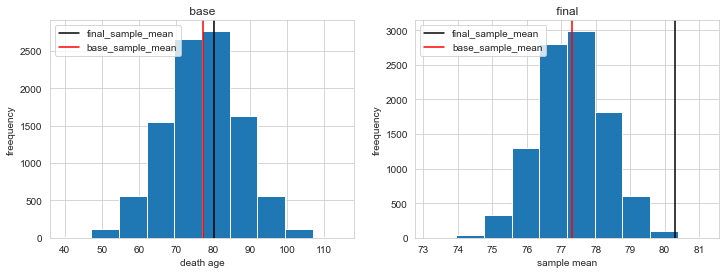

In [19]:
# simulation is based on data for Chile
# simulation parameters:
number_of_samples = 10000
sample_size = 100
base_sample_mean= 77.3 # mean LE for the country at year 2000
final_sample_mean = 80.3 # mean LE for the country at year 2015 = mean for final_sample
base_sample_std = 10 # standart deviation for base_population (there is 2 wys to astimate it: by simple brootforce and by Chebyshev's theorem)
final_sample_std = base_sample_std/sample_size**0.5 # standard error

# base_sample simulation. no info will be used from this graph, just for comparison and visualisation
base_sample = np.random.normal(base_sample_mean, scale=base_sample_std, size=number_of_samples)
plt.figure(figsize = (12,4))
plt.subplot(121)
plt.axvline(x=final_sample_mean, color='k', label = 'final_sample_mean')
plt.axvline(x=base_sample_mean, color='r', label = 'base_sample_mean')
plt.hist(base_sample)
plt.title(' base ')
plt.xlabel('death age')
plt.ylabel('freequency')
plt.legend(loc = 2)

# final_sample simulation
final_sample = np.random.normal(base_sample_mean, scale=final_sample_std, size=number_of_samples)
plt.subplot(122)
plt.axvline(x=final_sample_mean, color='k', label = 'final_sample_mean')
plt.axvline(x=base_sample_mean, color='r', label = 'base_sample_mean')
plt.hist(final_sample)
plt.title(' final ')
plt.xlabel('sample mean')
plt.ylabel('freequency')
plt.legend(loc = 2)

p = np.count_nonzero(final_sample> final_sample_mean)/number_of_samples
#print(sorted(final_sample))
print('p = ', p)

P is less than 0.05 so we can reject our null theory and conclude that there is positiv corelation between LE and comulative effect of impacting factors. GDP is one of them but its influence is not obvious. From one hand higher GDP means more money for science, medical researches, better technologies, easier access to high quality medical services that positively impact on LE. From another hand big GDP often connected with industry, different manufacturers, productions that is harmful for environment and ecology therefore negatively impacting on LE. Constant stress connected with earning money in permanent competitive environment also tends to different illness. 

#### So GDP have controversy impact on life expectancy and it is hard to estimate which one is stronger. Proportion of positive/negative influence of GDP may vary for different countries.

Let's apply simulation for Mexico - country that showed the lowest change in LA over observed period:

p =  0.0305


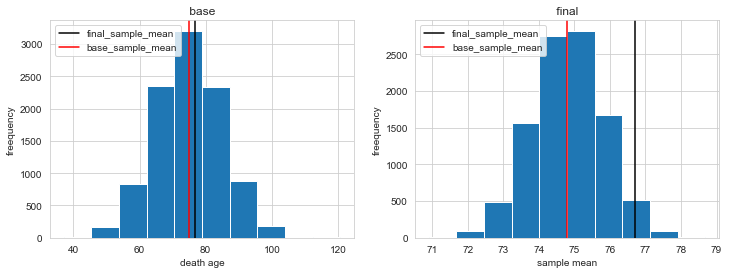

In [22]:
# simulation is based on data for Mexico
# simulation parameters:
number_of_samples = 10000
final_sample_mean = 76.7 # mean LE for the country at year 2015 = mean for final_sample
base_sample_mean= 74.8 # mean LE for the country at year 2000
sample_size = 100
base_sample_std = 10 # standart dewiation for base_population (there is 2 wys to astimate it: by simple brootforce and by Chebyshev's theorem)
final_sample_std = base_sample_std/sample_size**0.5 # standard error

# base_sample simulation. no info will be used from this graph, just for comparison and visualisation
base_sample = np.random.normal(base_sample_mean, scale=base_sample_std, size=number_of_samples)
plt.figure(figsize = (12,4))
plt.subplot(121)
plt.axvline(x=final_sample_mean, color='k', label = 'final_sample_mean')
plt.axvline(x=base_sample_mean, color='r', label = 'base_sample_mean')
plt.hist(base_sample)
plt.title(' base ')
plt.xlabel('death age')
plt.ylabel('freequency')
plt.legend(loc = 2)

# final_sample simulation
final_sample = np.random.normal(base_sample_mean, scale=final_sample_std, size=number_of_samples)
plt.subplot(122)
plt.axvline(x=final_sample_mean, color='k', label = 'final_sample_mean')
plt.axvline(x=base_sample_mean, color='r', label = 'base_sample_mean')
plt.hist(final_sample)
plt.title(' final ')
plt.xlabel('sample mean')
plt.ylabel('freequency')
plt.legend(loc = 2)

p = np.count_nonzero(final_sample> final_sample_mean)/number_of_samples
#print(sorted(final_sample))
print('p = ', p)

Result and conclusion same as for Chile 

For all countries set of factors that influence LE should be  more - less the same. Each country have its own values of this factors (one have good ecology and low GDP, other vice versa). Let's build a plot LE vs country to take a look at different sets of values of factors. 

<AxesSubplot:xlabel='Country', ylabel='Life expectancy at birth (years)'>

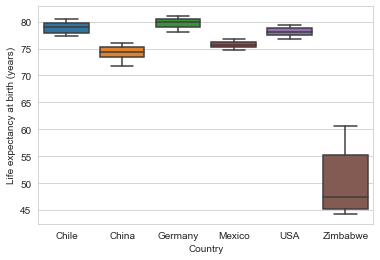

In [23]:
sns.boxplot(data = df, x= 'Country', y = 'Life expectancy at birth (years)',)
#plt.xticks(rotation='30')

On the graph abowe Zimbabwe have significantly lower LE than other countries but it cant be explauned only by low GDP. Chile have similar GDP but shoves one of the highest LE. Apparently there should be other factors that have stronger influence than GDP. 